<a href="https://colab.research.google.com/github/neophyte0903/streamLit_test_project/blob/main/Quikr_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
car=pd.read_csv('/content/quikr_car.csv')

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car.shape

(892, 6)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##### Creating backup copy

In [ ]:
car['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [ ]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data

In [ ]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

#### year is in object. Change to integer

In [ ]:
car['year'].dtypes

dtype('O')

#### Price has Ask for Price

In [ ]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [ ]:
car['Price']=car['Price'].str.replace(' ','').astype(int)

<ipython-input-22-341f67e51019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Price']=car['Price'].str.replace(' ','').astype(int)


In [ ]:
car['Price'].dtype

dtype('int64')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        857 non-null    object
 1   company     857 non-null    object
 2   year        857 non-null    object
 3   Price       857 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.9+ KB


In [ ]:
k=car.select_dtypes(include='object').columns
k

In [ ]:
car=car[car['Price']!='Ask For Price']

In [ ]:
car['Price'].unique()

array(['80,000', '4,25,000', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '10,00,000', '5,00,000', '3,50,000',
       '1,60,000', '3,10,000', '75,000', '1,00,000', '2,90,000', '95,000',
       '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000',
       '85,000', '2,00,000', '5,70,000', '1,10,000', '4,48,999',
       '18,91,111', '1,59,500', '3,44,999', '4,49,999', '8,65,000',
       '6,99,000', '3,75,000', '2,24,999', '12,00,000', '1,95,000',
       '3,51,000', '2,40,000', '90,000', '1,55,000', '6,00,000',
       '1,89,500', '2,10,000', '3,90,000', '1,35,000', '16,00,000',
       '7,01,000', '2,65,000', '5,25,000', '3,72,000', '6,35,000',
       '5,50,000', '4,85,000', '3,29,500', '2,51,111', 

#### Price has commas in its prices and is in object

In [ ]:
car['Price']=car['Price'].str.replace('₹','')

AttributeError: Can only use .str accessor with string values!

In [ ]:
car['Price']=car['Price'].str.replace(',','')

AttributeError: Can only use .str accessor with string values!

In [ ]:
car['Price'].dtypes

In [ ]:
car['Price']=car['Price'].astype(int)

####  kms_driven has object values with kms at last.

In [ ]:
car['Kms_driven'].unique()

array(['35,056 kms ', '44,000 kms ', '42,917 kms ', '16,112 kms ',
       '30,988 kms ', '69,163 kms ', '42,859 kms ', '34,919 kms ',
       '44,940 kms ', '13,687 kms ', '29,848 kms ', '21,426 kms ',
       '68,177 kms ', '70,650 kms ', '25,730 kms ', '47,096 kms ',
       '1,31,000 kms ', '26,000 kms ', '58,460 kms ', '48,000 kms ',
       '26,600 kms ', '36,000 kms ', '39,500 kms ', '76,000 kms ',
       '23,698 kms ', '37,860 kms ', '91,830 kms ', '31,172 kms ',
       '3,243 kms ', '9,616 kms ', '30,249 kms ', '60,875 kms ',
       '25,740 kms ', '38,587 kms ', '3,108 kms ', '35,353 kms ',
       '34,748 kms ', '2,359 kms ', '17,814 kms ', '68,934 kms ',
       '72,600 kms ', '81,000 kms ', '80,000 kms ', '12,000 kms ',
       '6,000 kms ', '56,000 kms ', '15,840 kms ', '32,482 kms ',
       '1,13,779 kms ', '26,150 kms ', '34,555 kms ', '30,880 kms ',
       '70,423 kms ', '30,232 kms ', '50,077 kms ', '18,482 kms ',
       '10,246 kms ', '25,021 kms ', '70,646 kms ', '45,490 kms

In [ ]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','').astype(int)

ValueError: cannot convert float NaN to integer

In [ ]:
car['Kms_driven']

,Kms_driven
0,35056
1,44000
2,42917
3,16112
4,30988
...,...
1027,65000
1028,60000
1029,31000
1030,31000


#### It has nan values and two rows have 'Petrol' in them

In [ ]:
car['Kms_driven'].dtypes

dtype('int64')

In [ ]:
car['Kms_driven'].max()

690000

In [ ]:
car[car['Kms_driven']==690000].index

Index([355], dtype='int64')

In [ ]:
car.drop(355,axis=0)

In [ ]:
car['Kms_driven']=car['Kms_driven'].astype(int)

In [ ]:
car['Kms_driven']

,Kms_driven
0,35056
1,44000
2,42917
3,16112
4,30988
...,...
1027,65000
1028,60000
1029,31000
1030,31000


#### fuel_type has nan values

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1026 non-null   object
 1   Label       1026 non-null   object
 2   Location    1024 non-null   object
 3   Price       1026 non-null   int64 
 4   Kms_driven  1026 non-null   int64 
 5   Fuel_type   1026 non-null   object
 6   Owner       738 non-null    object
 7   Year        1026 non-null   int64 
 8   Company     1026 non-null   object
dtypes: int64(3), object(6)
memory usage: 80.2+ KB


In [ ]:
car['Fuel_type'].unique()

array([' Petrol', ' Petrol ', ' Diesel ', ' Diesel', ' Electric ', ' CNG',
       ' LPG', ' Petrol + CNG ', ' Hybrid ', ' CNG '], dtype=object)

In [ ]:
car=car[~car['Fuel_type'].isna()]

In [ ]:
car['Fuel_type'].unique()

array([' Petrol', ' Petrol ', ' Diesel ', ' Diesel', ' Electric ', ' CNG',
       ' LPG', ' Petrol + CNG ', ' Hybrid ', ' CNG '], dtype=object)

In [ ]:
car['Fuel_type']=car['Fuel_type'].str.strip()

In [ ]:
p={'Petrol':1, 'Diesel':2, 'Electric':3, 'CNG':4, 'LPG':5, 'Petrol + CNG':6,
       'Hybrid':7}

In [ ]:
car['Fuel_type']=car['Fuel_type'].map(p)

In [ ]:
car['Owner'].unique()

array([nan, ' 2nd Owner', ' 1st Owner', ' 3rd Owner'], dtype=object)

In [ ]:
car['Owner'].fillna(0,inplace=True)

In [ ]:
x={' 2nd Owner':2, ' 1st Owner':1, ' 3rd Owner':3}

In [ ]:
car['Owner']=car['Owner'].map(x)

In [ ]:
car.shape

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [ ]:
car['Name']=car['Name'].str.split(' ').str.slice(start=0,stop=3).str.join(' ')

In [ ]:
car['Name']

,Name
0,Ford Figo Duratec
1,Maruti Suzuki Wagon
2,Hyundai Creta 1.6
3,Hyundai Venue -
4,Honda Jazz -
...,...
1027,Hyundai i10 Magna
1028,Maruti Suzuki Alto
1029,Jeep Compass Limited
1030,Jeep Compass Limited


#### Resetting the index of the final cleaned data

In [ ]:
car=car.reset_index(drop=True)

In [ ]:
car.shape

## Cleaned Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
car['Owner']=lr.fit_transform(car['Owner'])

In [ ]:
car['Owner'].unique()

array([3, 1, 0, 2])

In [ ]:
order={'NaN':0, ' 2nd Owner':2, ' 1st Owner':1, ' 3rd Owner':3}

In [ ]:
car['Owner']=car['Owner'].map(order)

In [ ]:
car.query('Location=="Delhi" and Price<=1000000 and Owner==1')

In [ ]:
car.head()

In [ ]:
Cleaned_Car=car.to_csv('/content/Cleaned_Car_data.csv')

In [ ]:
Cleaned_Car=pd.read_csv('/content/Cleaned_Car_data.csv')

In [ ]:
Cleaned_Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1026 non-null   int64  
 1   Name        1026 non-null   object 
 2   Label       1026 non-null   object 
 3   Location    1024 non-null   object 
 4   Price       1026 non-null   int64  
 5   Kms_driven  1026 non-null   int64  
 6   Fuel_type   1026 non-null   int64  
 7   Owner       0 non-null      float64
 8   Year        1026 non-null   int64  
 9   Company     1026 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 80.3+ KB


In [ ]:
Cleaned_Car.describe(include='all')

### Checking relationship of Company with Price

In [ ]:
car['Company'].unique()

array(['Ford', 'Maruti', 'Hyundai', 'Honda', 'Toyota', 'Jeep', 'Kia',
       'Tata', 'Audi', 'Renault', 'BMW', 'Nissan', 'MG', 'Mahindra',
       'Volkswagen', 'Volvo', 'Skoda', 'Jaguar', 'Mercedes', 'Ssangyong',
       'Fiat', 'Chevrolet', 'Datsun', 'Land', 'Porsche'], dtype=object)

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
#plt.subplots(figsize=(15,7))
ax=plt.scatter(x='Company',y='Price',data=car)
plt.xticks(rotation=50,ha='right')
plt.show()

In [ ]:
car[car['Company']=='Mercedes']

### Checking relationship of Year with Price

In [ ]:
car[car['Year']>=2019]

In [ ]:
df1=car.query('Year>=2019')

In [ ]:
df1.query('Location=="Delhi" and Year>=2019 and Price<=800000')

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Price',data=car)
plt.xticks(rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

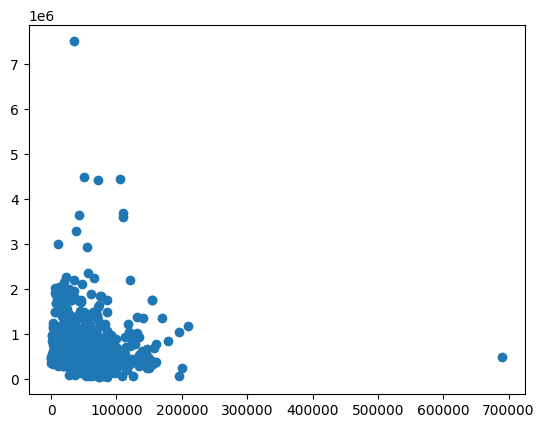

In [ ]:
plt.scatter(x='Kms_driven',y='Price',data=car)

### Checking relationship of Fuel Type with Price

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

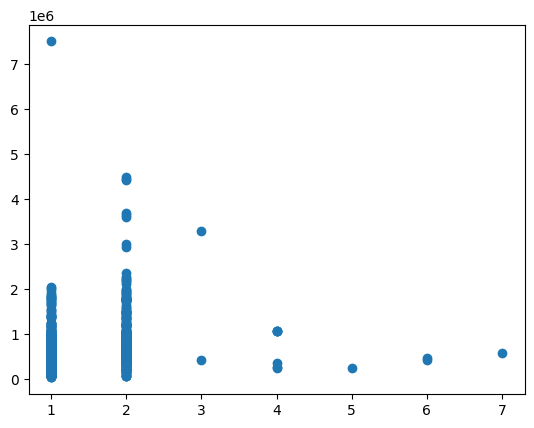

In [ ]:
plt.scatter(x='Fuel_type',y='Price',data=car)

In [ ]:
car=pd.read_csv('/content/cleaned_data_Quicker_cars.csv')

In [ ]:
car.dropna(inplace=True)

In [ ]:
car.sample()

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
553,Ford Ecosport - 2014,1,2,623399.0,30212.0,8,1,2014,5


### Extracting Training Data

In [ ]:
X=car[['Name','Company','Year','Kms_driven','Fuel_type']]
y=car['Price']

In [ ]:

X

,Name,Company,Year,Kms_driven,Fuel_type
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,5,2015,35056.0,7
1,Maruti Suzuki Wagon R VXI BS IV - 2016,14,2016,44000.0,7
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,7,2018,42917.0,7
3,Hyundai Venue - 2019,7,2019,16112.0,8
4,Honda Jazz - 2017,6,2017,30988.0,8
...,...,...,...,...,...
1027,Hyundai i10 Magna 1.2 - 2014,7,2014,65000.0,8
1028,Maruti Suzuki Alto K10 LXi CNG - 2014,14,2014,60000.0,7
1029,Jeep Compass Limited 2.0 Diesel - 2017,9,2017,31000.0,3
1030,Jeep Compass Limited 2.0 Diesel - 2017,9,2017,31000.0,3


In [ ]:
y

,Price
0,380000.0
1,465000.0
2,1350000.0
3,1019699.0
4,713499.0
...,...
1027,229000.0
1028,275000.0
1029,1750000.0
1030,1750000.0


### Applying Train Test Split

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1032 non-null   object 
 1   Label       1032 non-null   int64  
 2   Location    1032 non-null   int64  
 3   Price       1032 non-null   float64
 4   Kms_driven  1032 non-null   float64
 5   Fuel_type   1032 non-null   int64  
 6   Owner       1032 non-null   int64  
 7   Year        1032 non-null   int64  
 8   Company     1032 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 72.7+ KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['Name']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name']),
                                    remainder='passthrough')

In [ ]:
lr=LinearRegression()

#### Making a pipeline

In [ ]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi Q3 - 2015', 'Audi Q5 2.0 TDI quattro Premium Plus - 2014',
       'Audi Q7 3.0 TDI quattro Premium Plus - 2011',
       'Audi Q7 3.0 TDI quattro Premium Plus - 2013',
       'Audi Q7 35 TDI Premium Plus Sunroof - 2017',
       'BMW 3 Series 320d - 2013',
       'BMW 3 Series 320d Corpo...
       'Volkswagen Polo HIGHLINE1.2L PETROL - 2010',
       'Volkswagen Polo HIGHLINE1.2L PETROL - 2018',
       'Volkswagen Polo Highline Exquisite P - 2019',
       'Volkswagen Vento - 2015', 'Volkswagen Vento - 2017',
       'Volkswagen Vento Highline Petrol AT - 2013',
       'Volkswagen Vento Highline Petrol AT - 2015',
       'Volvo XC60 D3 Kinetic - 2012', 'Volvo XC90 D5 AWD - 2016'],
      dtype=object)]),
                                                  ['Name'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [ ]:
r2_score(y_test,y_pred)

0.2903433456084371

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

919

In [ ]:
scores[np.argmax(scores)]

0.5276387630583512

In [ ]:

pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

ValueError: Found unknown categories ['Maruti Suzuki Swift'] in column 0 during transform

#### The best model is found at a certain random state

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[0]